# 8. domača naloga

**Jaša Šonc, 23212125**

In [1]:
import numpy as np
import lvm_read
import matplotlib.pyplot as plt
from scipy import stats, integrate
import pyExSi as es

Offset: 2,25 V<br>
Amplituda: 1,6 V(Peak to peak )<br>
f$_k$: 23 <br>
$\Delta$f: 0,5 Hz

## Zajem signala

Uvozimo signal (en segment):

In [2]:
lvm = lvm_read.read('vaja8_meritev.lvm')

In [3]:
t1=lvm[0]['data'][:,0]
s1=lvm[0]['data'][:,1]

Prikažemo signal:

Text(0, 0.5, 'U [V]')

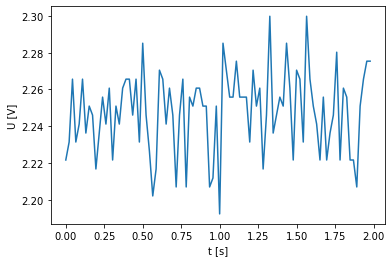

In [4]:
plt.plot(t1,s1)
plt.xlabel('t [s]')
plt.ylabel('U [V]')

### Povprečna vrednost

In [5]:
np.average(s1) #offset nastavljen 2,25 V

2.248004434782609

Vidimo, da povprečna vrednost ustreza nastavljeni.

## Frekvenča domena

In [6]:
S1=abs(np.fft.rfft(s1))/len(s1)
S1[1:]*=2
freq1=np.fft.rfftfreq(len(t1),d=t1[1])

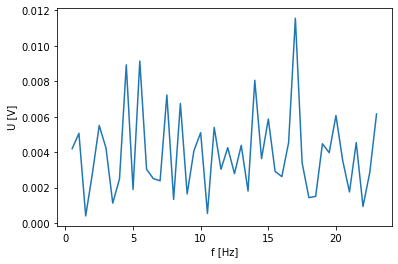

In [7]:
plt.plot(freq1[1:],S1[1:])
plt.xlabel('f [Hz]');
plt.ylabel('U [V]');

### Frekvenčna resolucija

In [8]:
freq1[1] #podatki 0.5Hz

0.5000030000180001

Frekvenčna resolucija ustreza zahtevani v podatkih.

### Frekvenčno območje

In [9]:
freq1[-1] #podatki 23 Hz

23.000138000828006

Frekvenčno območje ustreza zahtevanemu v podatkih.

## Ocena gostote porazdelitve verjetnosti vrednosti  𝑝(𝑥)

Določimo, sredjno vrednost in standardno deviacijo, ki ju potrebujemo za oceno gostote porazdelitve.

In [10]:
N = len(s1)
mu = np.average(s1)
sigma = np.std(s1)

Text(0, 0.5, 'p(x)')

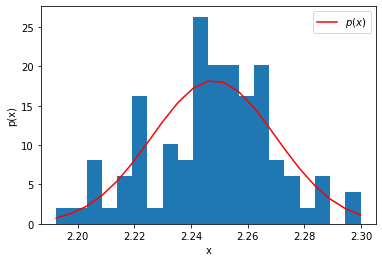

In [11]:
plt.figure()
hist, bins, _ = plt.hist(s1, bins=20, density=True);
plt.plot(bins,stats.norm.pdf(bins,mu,sigma), 'r', label='$p(x)$')
plt.legend()
plt.xlabel('x')
plt.ylabel('p(x)')

## Enostranska ter dvostranska avtospektralna gostota moči,  𝐺_𝑋𝑋  in  𝑆_𝑋𝑋

Določimo enostransko in dvostransko avtospektralno gostoto moči.

In [12]:
R_xx = np.correlate(s1-mu, s1-mu, mode='full') / sigma**2 / N

### Enostranska avtospektralna gostota moči

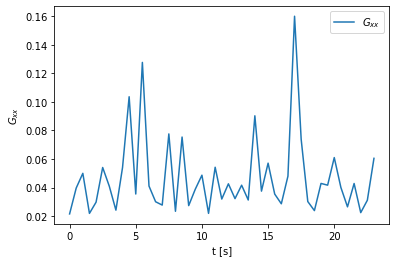

In [13]:
R_xx = R_xx[-len(s1):]

G_xx = np.fft.rfft(R_xx) / len(R_xx) * 2 * t1[-1]
freq_xx = np.fft.rfftfreq(len(s1), t1[1])


plt.plot(freq_xx, abs(G_xx),label='$G_{xx}$')
plt.xlabel('t [s]')
plt.ylabel('$G_{xx}$')
plt.legend();

### Dvostranska autospektralna gostota moči

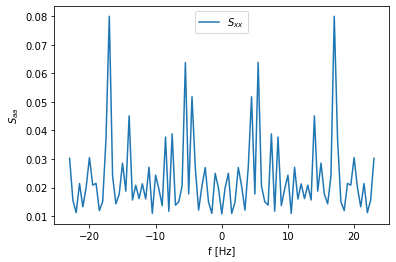

In [14]:
S_xx = np.hstack([-G_xx[::-1], G_xx[1:]])/2
freq_sxx = np.hstack([-freq_xx[::-1], freq_xx[1:]])

plt.plot(freq_sxx, np.abs(S_xx), label='$S_{xx}$')
plt.legend()
plt.xlabel('f [Hz]')
plt.ylabel('$S_{aa}$');


## Momenti funkcije gostote verjetnosti

Izračunamo prve štiri momente funkcije gostote verjetnosti:

In [15]:
momenti = [integrate.trapz((2*np.pi*freq_xx)**i*G_xx) for i in [0,1,2,3]] 

In [16]:
[print('m'+str(i)+': '+ str(momenti[i])) for i in [0,1,2,3]];

m0: (1.9782609999999998-0.03951254630143455j)
m1: (142.7535344865081-6.967308857208389j)
m2: (13530.652011738963-816.2107626387349j)
m3: (1441909.9983427245-99687.44433999469j)


## Stacionarnost in ergodičnost

Zajeli smo 28 segmetov meritve signala. Z njimi bomo ovrednotili stacionarnost in ergodičnost:

In [17]:
s_all=np.empty([0,92,2])
for i in range(28):
    s_all=np.append(s_all,[lvm[i]['data'][:,:2]],axis=0)

Prikažemo vse segmente:

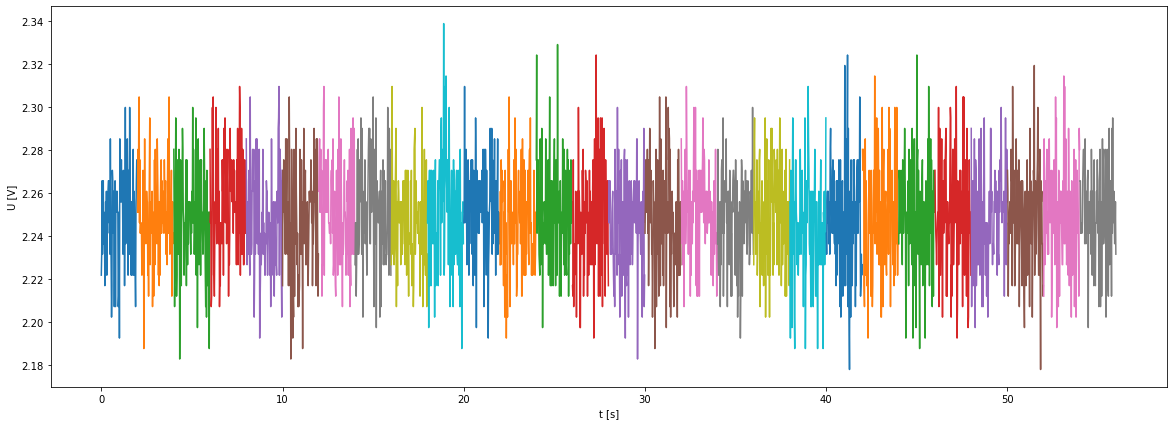

In [18]:
plt.figure(figsize=(20,7))
[plt.plot(s_all[i,:,0]+i*2,s_all[i,:,1]) for i in range(len(s_all))];
plt.xlabel('t [s]');
plt.ylabel('U [V]');

### Stacionarnost

Izračunamo povprečje vsakega segmenta posebej:

In [19]:
averages=np.average(s_all[:,:,1],axis=1) 

Izračunamo varianco vsakega segmenta posebej:

In [20]:
variance=np.var(s_all[:,:,1],axis=1)

Prikažemo povprečno vrednost in varianco vseh segmentov. Vidimo, da sta precej konstantni, z manjšim nihanjem.

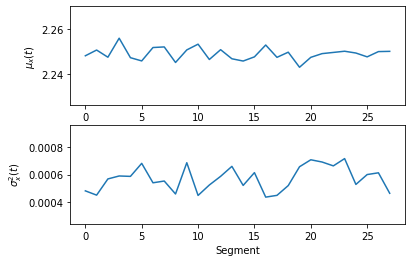

In [21]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(averages)
ax[0].set_ylim(mu-sigma, mu+sigma)
ax[0].set_xlabel('Segment')
ax[0].set_ylabel('$\mu_x(t)$');

ax[1].plot(variance)
ax[1].set_ylim(sigma**2-sigma**2/2, sigma**2+sigma**2)
ax[1].set_xlabel('Segment')
ax[1].set_ylabel('$\sigma^2_x(t)$');

### Ergodičnost

Preverimo, če so statistične lastnosti enega segmenta reprezentativne za popis celotnega signala:

Najprej naredimo en array iz vseh segmentov:

In [22]:
s_all_flatten=s_all[:,:,1].flatten()

In [23]:
len(s_all_flatten)

2576

Povprečje:

In [24]:
np.average(s1) #Povprečje enega segmenta

2.248004434782609

In [25]:
np.average(s_all_flatten) #Povprečje celotnega signala

2.2488895935559006

Varianca:

In [26]:
np.var(s1) #Varianca enega segmenta

0.00048096134561531145

In [27]:
np.var(s_all_flatten) #Varianca celotnega signala

0.0005784659936185768

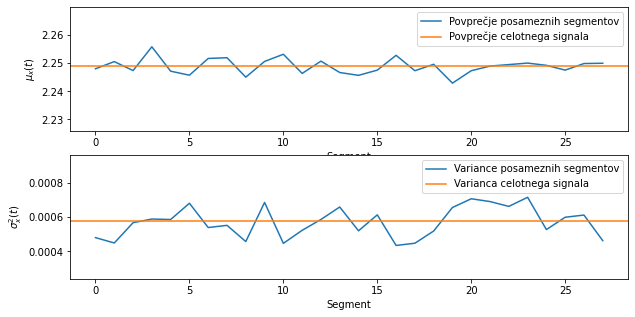

In [28]:
fig, ax = plt.subplots(2, 1,figsize=(10,5))
ax[0].plot(averages,label='Povprečje posameznih segmentov')
ax[0].set_ylim(mu-sigma, mu+sigma)
ax[0].set_xlabel('Segment')
ax[0].set_ylabel('$\mu_x(t)$');
ax[0].axhline(np.average(s_all_flatten),c='C1',label='Povprečje celotnega signala')
ax[0].legend()

ax[1].plot(variance,label='Variance posameznih segmentov')
ax[1].set_ylim(sigma**2-sigma**2/2, sigma**2+sigma**2)
ax[1].axhline(np.var(s_all_flatten),c='C1',label='Varianca celotnega signala')
ax[1].legend()
ax[1].set_xlabel('Segment')
ax[1].set_ylabel('$\sigma^2_x(t)$');

Opazimo, da povprečje posameznih segmentov precej malo odstopa od povprečja celotnega signala, ranga 0.01/2.25=0.44%, medtem ko varianca odstopa precej bolj, 0.0001/0.0006 =16.6\%

# Numerično generirani signali

Numerično generiramo nestacionaren Gaussov in stacionaren ne-Gaussov signal. Uporabimo knjižnico pyExSi:

### Nestacionaren Gaussov

In [29]:
N = 2**16 # number of data points of time signal
fs = 1024 # sampling frequency [Hz]
t = np.arange(0,N)/fs # time vector

# define frequency vector and one-sided flat-shaped PSD
M = N//2 + 1 # number of data points of frequency vector
freq = np.arange(0, M, 1) * fs / N # frequency vector
freq_lower = 50 # PSD lower frequency limit  [Hz]
freq_upper = 100 # PSD upper frequency limit [Hz]
PSD = es.get_psd(freq, freq_lower, freq_upper) # one-sided flat-shaped PSD

#amplitude modulation, modulating signal defined by PSD
PSD_modulating = es.get_psd(freq, freq_lower=1, freq_upper=100)
#define array of parameters delta_m and p
delta_m_list = np.arange(.1,2.1,.5)
p_list = np.arange(.1,2.1,.5)

Generiramo nestacionarni Gaussov signal, tako, da nastavimo kurtosis parameter na vrednost 3 (Gaussova porazdelitev) in ga moduliramo (nestacionaren):

In [30]:
gaussian_nonstationary_signal = es.nonstationary_signal(N,PSD,fs,k_u=3,modulating_signal=('PSD', PSD_modulating),param1_list=p_list,param2_list=delta_m_list)

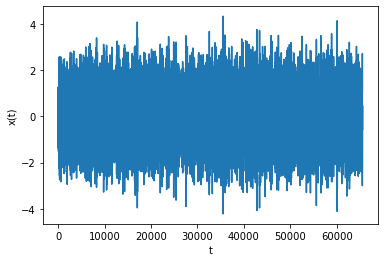

In [31]:
plt.plot(gaussian_nonstationary_signal);
plt.xlabel('t');
plt.ylabel('x(t)');

### Stacionaren ne-gaussov

Nastavimo kurtosis paramter na 15 (izven vrednosti 3), dobimo ne-gaussovo porazdelitev:

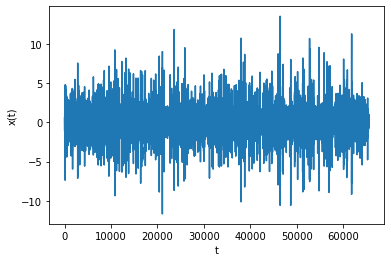

In [32]:
plt.plot(es.stationary_nongaussian_signal(N, PSD, fs, s_k=0, k_u=15));
plt.xlabel('t');
plt.ylabel('x(t)');